# WeatherPy
----

### Analysis
* As expected, cities in the latitudes of approximately -20 to 20 degrees had the highest max temperatures. 
* There were no strong relationships that could be observed between latitude and humidity. (Oddly, when the analysis was run initially, there was one city that had >300% humidity that may have been an error in recording, so added an extra step to remove any observation points that had >100% humidity. When run again, there were no outliers but kept the filtering step in the code.)
* There were no observable relationships between latitude and cloudiness. 
* There were no observable relationships between latitude and wind speed. There seems to be more cities that have greater than 5 mph wind speeds in the northern hemisphere, but this is most likely due to the fact that there are more cities in the northern hemisphere, and not an indication of a relationship between latitude and wind speeds.  

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

740

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Created a function that will pull desired data from the weather API
def check_weather(city):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "metric"
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    response = requests.get(query_url)
    out_json = response.json()
   
    try:
        print(f"Processing record for {city}.")
        print(query_url)
        return {
            "City": city,
            "Cloudiness": out_json['clouds']['all'],
            "Country": out_json['sys']['country'],
            "Date": out_json['dt'],
            "Humidity": out_json['main']['humidity'],
            "Lat": out_json['coord']['lat'],
            "Lng": out_json['coord']['lon'],
            "Max Temp": out_json['main']['temp_max'],
            "Wind Speed": out_json['wind']['speed']
        }
       
    
    except (KeyError, IndexError):
        print(f"{city} not found...skipping...")
        return {
            "City": city,
            "Cloudiness": np.nan,
            "Country": np.nan,
            "Date": np.nan,
            "Humidity": np.nan,
            "Lat": np.nan,
            "Lng": np.nan,
            "Max Temp": np.nan,
            "Wind Speed": np.nan
        }
        

In [4]:
# Retrieve data for the cities in cities list and make a list of dictionaries
all_cities_results = [check_weather(city) for city in cities]
all_cities_results

Processing record for hermanus.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=hermanus
Processing record for severo-kurilsk.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=severo-kurilsk
Processing record for souillac.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=souillac
Processing record for vaini.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=vaini
Processing record for castro.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=castro
Processing record for kungurtug.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kungurtug
Processing record for tasiilaq.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=tasiilaq
Pr

Processing record for yellowknife.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=yellowknife
Processing record for arraial do cabo.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=arraial do cabo
Processing record for ceres.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=ceres
Processing record for sao joao da barra.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=sao joao da barra
Processing record for borovskoy.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=borovskoy
Processing record for nome.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=nome
Processing record for praia.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=m

Processing record for vysokogornyy.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=vysokogornyy
Processing record for huarmey.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=huarmey
Processing record for katsuura.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=katsuura
Processing record for hualmay.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=hualmay
Processing record for toliary.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=toliary
toliary not found...skipping...
Processing record for lana.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=lana
Processing record for warqla.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=

Processing record for taitung.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=taitung
Processing record for okhotsk.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=okhotsk
Processing record for kotri.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kotri
Processing record for samusu.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=samusu
samusu not found...skipping...
Processing record for tsihombe.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=tsihombe
tsihombe not found...skipping...
Processing record for galle.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=galle
Processing record for saldanha.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e92

Processing record for umm durman.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=umm durman
umm durman not found...skipping...
Processing record for luena.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=luena
Processing record for yakeshi.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=yakeshi
Processing record for vestmanna.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=vestmanna
Processing record for mazamari.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=mazamari
Processing record for sakakah.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=sakakah
sakakah not found...skipping...
Processing record for maceio.
http://api.openweathermap.org/data/2.5/weather?appid=1a

Processing record for saint george.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=saint george
Processing record for takoradi.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=takoradi
Processing record for lima.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=lima
Processing record for dongying.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=dongying
Processing record for kapuskasing.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kapuskasing
Processing record for husavik.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=husavik
Processing record for batemans bay.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=bateman

Processing record for tuy hoa.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=tuy hoa
Processing record for tiznit.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=tiznit
Processing record for ugoofaaru.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=ugoofaaru
Processing record for sao filipe.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=sao filipe
Processing record for goderich.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=goderich
Processing record for grand baie.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=grand baie
Processing record for aden.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=aden
Processing

Processing record for fairbanks.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=fairbanks
Processing record for tonj.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=tonj
tonj not found...skipping...
Processing record for concordia.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=concordia
Processing record for banfora.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=banfora
Processing record for kichera.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kichera
Processing record for haapiti.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=haapiti
Processing record for bonanza.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric

Processing record for mao.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=mao
Processing record for waimana.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=waimana
Processing record for mumford.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=mumford
Processing record for carballo.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=carballo
Processing record for aasiaat.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=aasiaat
Processing record for kosovo polje.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kosovo polje
Processing record for orlik.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=orlik
Processing record fo

Processing record for pringsewu.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=pringsewu
Processing record for otukpo.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=otukpo
Processing record for dawson creek.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=dawson creek
Processing record for emmett.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=emmett
Processing record for rancho palos verdes.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=rancho palos verdes
Processing record for rock sound.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=rock sound
Processing record for jaque.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units

Processing record for contai.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=contai
Processing record for coari.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=coari
Processing record for nampula.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=nampula
Processing record for mulchen.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=mulchen
Processing record for ardakan.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=ardakan
Processing record for nybro.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=nybro
Processing record for sungaipenuh.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=sungaipenuh
Processing record for 

Processing record for dawlatabad.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=dawlatabad
Processing record for livingstone.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=livingstone
Processing record for maniitsoq.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=maniitsoq
Processing record for kupang.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kupang
Processing record for bom jesus.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=bom jesus
Processing record for thyolo.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=thyolo
Processing record for bucerias.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=bucerias


Processing record for horodkivka.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=horodkivka
Processing record for cockburn town.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=cockburn town
Processing record for sur.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=sur
Processing record for svit.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=svit
Processing record for agadez.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=agadez
Processing record for vicuna.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=vicuna
vicuna not found...skipping...
Processing record for avera.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q

Processing record for marienburg.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=marienburg
Processing record for ulagan.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=ulagan
Processing record for bonavista.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=bonavista
Processing record for kalmunai.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=kalmunai
Processing record for laiwu.
http://api.openweathermap.org/data/2.5/weather?appid=1a16c12025dd2256e920f4c75df29917&units=metric&q=laiwu


[{'City': 'hermanus',
  'Cloudiness': 0,
  'Country': 'ZA',
  'Date': 1551812473,
  'Humidity': 77,
  'Lat': -34.42,
  'Lng': 19.24,
  'Max Temp': 20.56,
  'Wind Speed': 0.89},
 {'City': 'severo-kurilsk',
  'Cloudiness': 64,
  'Country': 'RU',
  'Date': 1551812552,
  'Humidity': 100,
  'Lat': 50.68,
  'Lng': 156.12,
  'Max Temp': -5.8,
  'Wind Speed': 4.94},
 {'City': 'souillac',
  'Cloudiness': 0,
  'Country': 'FR',
  'Date': 1551812409,
  'Humidity': 71,
  'Lat': 45.6,
  'Lng': -0.6,
  'Max Temp': 13.89,
  'Wind Speed': 3.6},
 {'City': 'vaini',
  'Cloudiness': 0,
  'Country': 'IN',
  'Date': 1551812554,
  'Humidity': 88,
  'Lat': 15.34,
  'Lng': 74.49,
  'Max Temp': 17.23,
  'Wind Speed': 1.39},
 {'City': 'castro',
  'Cloudiness': 75,
  'Country': 'CL',
  'Date': 1551808800,
  'Humidity': 72,
  'Lat': -42.48,
  'Lng': -73.76,
  'Max Temp': 16,
  'Wind Speed': 7.7},
 {'City': 'kungurtug',
  'Cloudiness': 0,
  'Country': 'RU',
  'Date': 1551812557,
  'Humidity': 53,
  'Lat': 50.6,
  'L

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert data to a dataframe
city_weather_df = pd.DataFrame(all_cities_results)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,0.0,ZA,1.551812e+09,77.0,-34.42,19.24,20.56,0.89
1,severo-kurilsk,64.0,RU,1.551813e+09,100.0,50.68,156.12,-5.80,4.94
2,souillac,0.0,FR,1.551812e+09,71.0,45.60,-0.60,13.89,3.60
3,vaini,0.0,IN,1.551813e+09,88.0,15.34,74.49,17.23,1.39
4,castro,75.0,CL,1.551809e+09,72.0,-42.48,-73.76,16.00,7.70


In [6]:
# Check to see if we have more than 500 data points
city_weather_df.count()

City          740
Cloudiness    667
Country       667
Date          667
Humidity      667
Lat           667
Lng           667
Max Temp      667
Wind Speed    667
dtype: int64

In [7]:
# Reformat Date column
city_weather_df['Date'] = city_weather_df['Date'].apply(lambda x: '{:.0f}'.format(x))
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,0.0,ZA,1551812473,77.0,-34.42,19.24,20.56,0.89
1,severo-kurilsk,64.0,RU,1551812552,100.0,50.68,156.12,-5.80,4.94
2,souillac,0.0,FR,1551812409,71.0,45.60,-0.60,13.89,3.60
3,vaini,0.0,IN,1551812554,88.0,15.34,74.49,17.23,1.39
4,castro,75.0,CL,1551808800,72.0,-42.48,-73.76,16.00,7.70


In [8]:
# Save dataframe to csv file
city_weather_df.to_csv('cities_weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

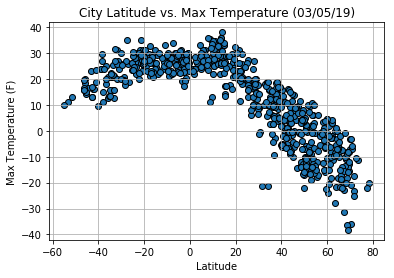

In [9]:
# Generate scatter plot for latitude vs max temp
latitudes = city_weather_df['Lat']
maximum_temps = city_weather_df['Max Temp']
plt.scatter(latitudes, maximum_temps, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (03/05/19)')
plt.savefig('latitude_max_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (03/05/19)')

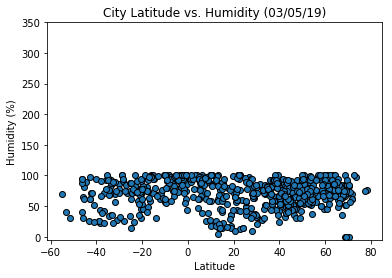

In [10]:
# Generate scatter plot for latitude vs humidity
latitudes = city_weather_df['Lat']
humidity = city_weather_df['Humidity']
plt.scatter(latitudes, humidity, edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.yticks(np.arange(0, 400, step=50))
plt.title('City Latitude vs. Humidity (03/05/19)')


In [11]:
# After taking a look at the initial plot, there seemed to be an outlier point
# Identify the outlier
humidity_outlier = city_weather_df.loc[city_weather_df['Humidity'] > 100]
humidity_outlier

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [12]:
# Make new dataframe that has cities only with humidity <= 100%
city_weather_df2 = city_weather_df[city_weather_df['Humidity'] <= 100]
city_weather_df2.loc[city_weather_df2['Humidity'] > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


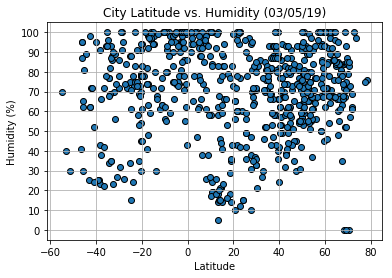

In [13]:
# Replot the data for new dataframe
latitudes2 = city_weather_df2['Lat']
humidity = city_weather_df2['Humidity']
plt.scatter(latitudes2, humidity, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.yticks(np.arange(0, 110, step=10))
plt.title('City Latitude vs. Humidity (03/05/19)')
plt.savefig('latitude_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

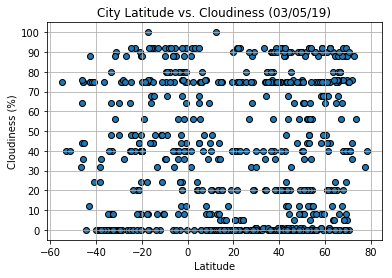

In [14]:
# Generate plot for latitude vs cloudiness
latitudes = city_weather_df['Lat']
cloudiness = city_weather_df['Cloudiness']
plt.scatter(latitudes, cloudiness, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.yticks(np.arange(0, 110, step=10))
plt.title('City Latitude vs. Cloudiness (03/05/19)')
plt.savefig('latitude_cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

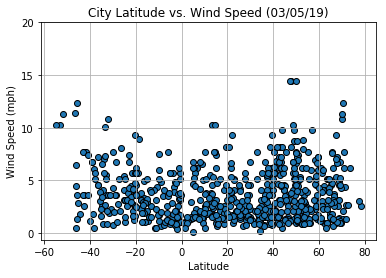

In [15]:
# Generate plot for latitude vs cloudiness
latitudes = city_weather_df['Lat']
wind_speed = city_weather_df['Wind Speed']
plt.scatter(latitudes, wind_speed, edgecolor='black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.yticks(np.arange(0, 25, step=5))
plt.title('City Latitude vs. Wind Speed (03/05/19)')
plt.savefig('latitude_wind_speed.png')
plt.show()